<a href="https://colab.research.google.com/github/Pradeep-239/ImageProcessing/blob/main/1D_bicubic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Mounted at /content/gdrive


In [ ]:
img = cv2.imread('/content/gdrive/MyDrive/flower.jfif')

In [ ]:
h,k,l = img.shape

In [ ]:
def bicubic(fm, f0 , f1,f2,civ):
  coef = civ @(np.array([fm,f0,f1,f2]).reshape(4,1))
  coef=coef.flatten()
  #coef.dtype = np.int32
  return [int(coef[0]+ k*coef[1] + (k**2)*coef[2] + (k**3)*coef[3]) for k in [-0.5,0.5,1.5]]

In [ ]:
coinv = np.linalg.inv(np.array([[1,-1,1,-1],[1,0,0,0],[1,1,1,1],[1,2,4,8]]))

In [ ]:
nlen =2*h -1
nwid= 2*k -1
bic = np.zeros((nlen,nwid,3),np.int32)

In [ ]:
for l in range(3):
  flat = img[:,:,l].flatten()
  loc=0
  for i in range(0,nlen,2):
    for j in range(0,nwid,2):
      bic[i,j,l] = flat[loc]
      loc+=1

In [ ]:
for k in range(3):
  for i in range(0,nlen,2):
      j=0
      #limit = int(nwid%7)
      while(j<=nwid-7):
             value= list(np.abs(bicubic(bic[i,j,k],bic[i,j+2,k],bic[i,j+4,k],bic[i,j+6,k],coinv)))
             for m in range(3):
                 bic[i,j+1+m*2,k]=value[m]
             j=j+6
      if(j<nwid-1):
           value= list(np.abs(bicubic(bic[i,nwid-7,k],bic[i,nwid-5,k],bic[i,nwid-3,k],bic[i,nwid-1,k],coinv)))
           for m in range(3):
                  bic[i,nwid-6+m*2,k]=value[m]

In [ ]:
for k in range(3):
  for j in range(nwid):
    i=0
    #limit =int(nlen%7)
    while(i<= nlen-7):
      value= list(np.abs(bicubic(bic[i,j,k],bic[i+2,j,k],bic[i+4,j,k],bic[i+6,j,k],coinv)))
      for m in range(3):
        bic[i+1+2*m,j,k]=value[m]
      i=i+6
    if(i<nlen-1):
          value= list(np.abs(bicubic(bic[nlen-7,j,k],bic[nlen-5,j,k],bic[nlen-3,j,k],bic[nlen-1,j,k],coinv)))
          for m in range(3):
                  bic[nlen-6+ m*2,j,k]=value[m]
  

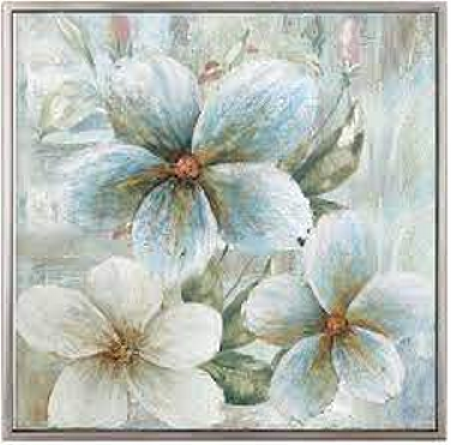

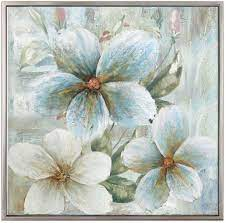

In [ ]:
cv2_imshow(bic)
cv2_imshow(img)